In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from functools import reduce

In [2]:
questions = pd.read_csv("questions.csv", na_values=["", "NA", "NULL"])
questionposts = pd.read_csv("labeled_data.csv", na_values=["", "NA", "NULL"])

In [3]:
questions_cat = questions.loc[:, ["QuestionUno", "Category", "Subcategory"]]

In [4]:
questionposts_cat = pd.merge(questionposts, questions_cat, on="QuestionUno", how="left")

In [5]:
questionposts_cat.head()

,QuestionUno,PostText,label,Category,Subcategory
0,B7C95D50-6C81-4E61-BC16-81077B7D3F7E,Do you still need help with this issue? It ha...,0,Housing and Homelessness,Housing or Property Owned
1,C579CE49-6B7A-44E7-A203-5D3E52623804,Anyone?,1,Housing and Homelessness,Housing or Property Owned
2,F3A78AD3-D3D4-447F-BEAF-F62F1D1D4CCE,Yes those are the right forms. Im sorry I did...,0,Family and Children,Family/Divorce/Custody
3,5F8506D3-D9F1-48EE-8081-D30259DBF4E8,Hi You do make some good points. The differen...,0,Other,Other
4,B4C814C9-8983-413F-8BC4-F2BE01665555,My father passed away and I have DNA test resu...,1,Family and Children,Wills/Inheritance


In [6]:
questionposts_cat = questionposts_cat[questionposts_cat['label'] == 1]

In [7]:
# questionposts_cat.groupby('Category').agg(n=('Category', 'count')).sort_values('n', ascending=False)


# Client

In [8]:
text = questionposts_cat['PostText']
text = text.astype(str)

In [9]:
text.head()

1                                              Anyone?
4    My father passed away and I have DNA test resu...
5    I called TMobile and asked to get a copy of th...
7         Okay thankyou so much for the clarification!
8    . The car got impounded and we are now be thre...
Name: PostText, dtype: object

In [10]:
# print(len(text))

In [11]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
# Define stop words
stop_words = set(stopwords.words('english'))

In [13]:
# Define a function to preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join the filtered tokens
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

In [14]:
# Preprocess the text data
text = text.apply(preprocess_text)
# text = text.sort_values(by = "w")
# text = text[1]

In [15]:
# text

In [16]:
# Combine all preprocessed text
combined_text = ' '.join(text.tolist())
# custom_stopwords = set(['said', 'just', 'like', 'would'])
# stopwords = stopwords.union(custom_stopwords)

In [17]:
# combined_text

In [18]:
# Generate a word frequency table
word_freq = nltk.FreqDist(word_tokenize(combined_text))
df_word_freq = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the word frequency table in descending order of frequency
df_word_freq = df_word_freq.sort_values('Frequency', ascending=False)

# Display the word frequency table
print(df_word_freq)

                    Word  Frequency
10                     .    1440430
1                      ?     240980
11                 would     125752
19                   get     108766
155                court     103136
...                  ...        ...
118047        highway.my          1
118048  insurance.please          1
118049          dryer.on          1
118050              frre          1
256797             rkkii          1

[256798 rows x 2 columns]


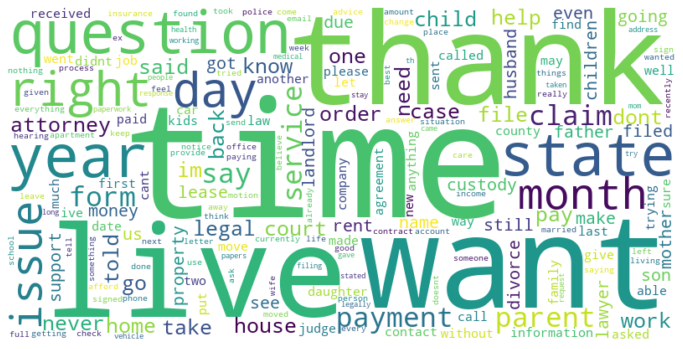

In [19]:
df_word_freq = df_word_freq[1:300]
combined_text = ' '.join(df_word_freq["Word"].tolist())
# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

only noun

In [20]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Define stop words
# stop_words = set(stopwords.words('english'))

# # Define a function to preprocess the text data
# def preprocess_text(text):
#     # Convert to lowercase
#     text = text.lower()
#     # Tokenize the text
#     tokens = word_tokenize(text)
#     # Remove stop words and keep only nouns
#     filtered_tokens = [token for (token, pos) in nltk.pos_tag(tokens) if (token not in stop_words) and (pos.startswith('N'))]
#     # Lemmatize the filtered tokens
#     lemmatizer = WordNetLemmatizer()
#     filtered_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
#     # Join the filtered tokens
#     preprocessed_text = ' '.join(filtered_tokens)
#     return preprocessed_text

# # Preprocess the text data
# text = text.apply(preprocess_text)

# # Combine all preprocessed text
# combined_text = ' '.join(text.tolist())

# # Generate the word cloud
# wordcloud = WordCloud(background_color='white', width=800, height=400).generate(combined_text)

# # Display the word cloud
# plt.figure(figsize=(12,10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


The frequency and sentiment of words used in the client-lawyer exchange 

In [21]:
# !pip install textblob 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from textblob import TextBlob

# Create a corpus of the post texts
corpus = questionposts_cat["PostText"]
corpus = corpus.astype(str)

# Preprocess the text
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text):
    text = text.lower()
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

corpus = corpus.apply(preprocess)

# Create a document term matrix
vectorizer = CountVectorizer(min_df=50)
dtm = vectorizer.fit_transform(corpus)

# Find the most frequent words
freq_words = vectorizer.get_feature_names()

# Create a dataframe of the frequency of each word
word_freq = pd.DataFrame(data={"word": freq_words, "freq": dtm.sum(axis=0).tolist()[0]})

# Order the dataframe by frequency
word_freq = word_freq.sort_values("freq", ascending=False)

# Print the results
print(word_freq)

           word    freq
2958        get  134792
7433      would  126067
1627      court  111777
4411       need   98923
2696       file   96479
...         ...     ...
5326      rains      50
619    aspxbest      50
4364  multiunit      50
552     approve      50
6154   someplac      50

[7493 rows x 2 columns]


In [22]:
import pandas as pd
from textblob import TextBlob

text = questionposts_cat["PostText"]
text = text.astype(str)

# Define a function to get the sentiment score of each sentence
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the conversation data
text['sentiment_score'] = text.apply(lambda x: get_sentiment(x))

# Define a function to classify the sentiment based on the score
def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the sentiment scores
text['sentiment'] = text['sentiment_score'].apply(classify_sentiment)

# Print the sentiment analysis results
print(text[['sentiment_score', 'sentiment']])


sentiment_score    1         0.000000
4         0.000000
5       ...
sentiment          1          neutral
4          neutral
5       ...
Name: PostText, dtype: object


In [23]:
# Get the frequency of each sentiment value
sentiment_counts = text['sentiment'].value_counts()

# Create a DataFrame with the sentiment counts
sentiment_df = pd.DataFrame({
    'Sentiment': sentiment_counts.index,
    'Count': sentiment_counts.values
})

# Print the DataFrame
print(sentiment_df)

  Sentiment   Count
0  positive  172686
1  negative   71764
2   neutral   53685
